In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.tree import DecisionTreeClassifier
# Health data for women


In [2]:
# Load the Diabetes CSV in pandas, remove all the rows that are having 0 readings, means metric is not recorded and hence
# not useful. Instead of deleting you can set values like Mode or median based on logic you want to put.
diabeties = pd.read_csv("diabetes.csv")
diabeties = diabeties[diabeties.Insulin != 0]
diabeties = diabeties[diabeties.BloodPressure != 0]
diabeties = diabeties[diabeties.Glucose != 0]
diabeties = diabeties[diabeties.SkinThickness != 0]
diabeties = diabeties[diabeties.BMI != 0]
print("-----------------------------")
print(diabeties.head())
print('-----------------------------')
print(diabeties.describe())
print('-----------------------------')
print(diabeties.info())
print('-----------------------------')

-----------------------------
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
6             3       78             50             32       88  31.0   
8             2      197             70             45      543  30.5   
13            1      189             60             23      846  30.1   

    DiabetesPedigreeFunction  Age  Outcome  
3                      0.167   21        0  
4                      2.288   33        1  
6                      0.248   26        1  
8                      0.158   53        1  
13                     0.398   59        1  
-----------------------------
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   392.000000  392.000000     392.000000     392.000000  392.000000   
mean      3.301020  122.627551      70.663265      29.145408  156.056122   
std

In [3]:
# With above output, it shows that we have data in all cells
# Give focus on describe out put, you will see that mean, std, min, max have very different values in different columns.
# This means, their scales are different. Hence we need to process the data and need to put them on same scale.

# If you have some feature with non numeric values you need to encode them to numeric values using LabelEncoder
# In our case there is no such column. Remember machine learning code can't work on strings, you need to encode 
# them to some numeric format. 

# Outcome shows the result of suger test, 0 means test is negative while 1 means test is positve for suger

#Lets analysis some data using scatter plot


Text(0, 0.5, 'Suger Test Result')

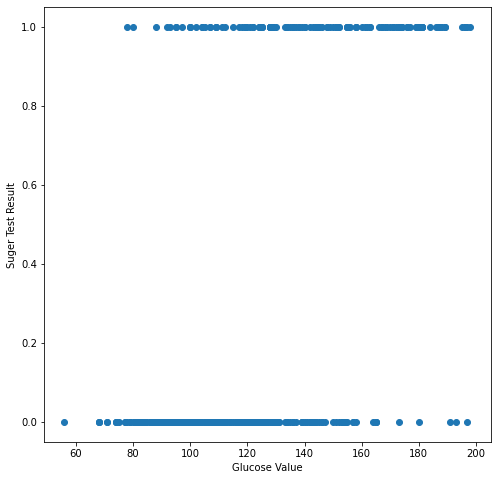

In [4]:
plt.figure(figsize=(8,8))
plt.scatter(diabeties['Glucose'], diabeties['Outcome'])
plt.xlabel("Glucose Value")
plt.ylabel("Suger Test Result")

Text(0, 0.5, 'Insulin')

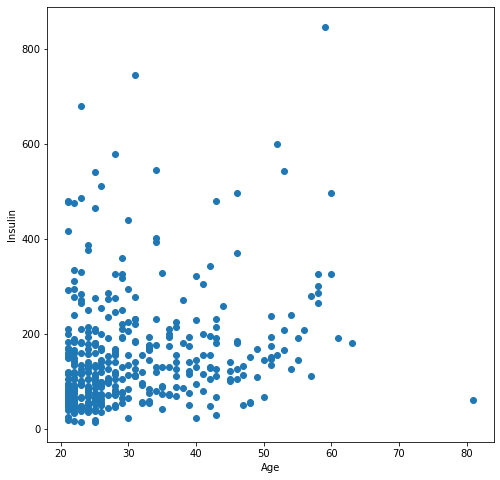

In [5]:
plt.figure(figsize=(8,8))
plt.scatter(diabeties['Age'], diabeties['Insulin'])
plt.xlabel("Age")
plt.ylabel("Insulin")

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.198291       0.213355       0.093209   
Glucose                      0.198291  1.000000       0.210027       0.198856   
BloodPressure                0.213355  0.210027       1.000000       0.232571   
SkinThickness                0.093209  0.198856       0.232571       1.000000   
Insulin                      0.078984  0.581223       0.098512       0.182199   
BMI                         -0.025347  0.209516       0.304403       0.664355   
DiabetesPedigreeFunction     0.007562  0.140180      -0.015971       0.160499   
Age                          0.679608  0.343641       0.300039       0.167761   
Outcome                      0.256566  0.515703       0.192673       0.255936   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.078984 -0.025347                  0.007562   
Glucose                   0.581223  0.209

<AxesSubplot:>

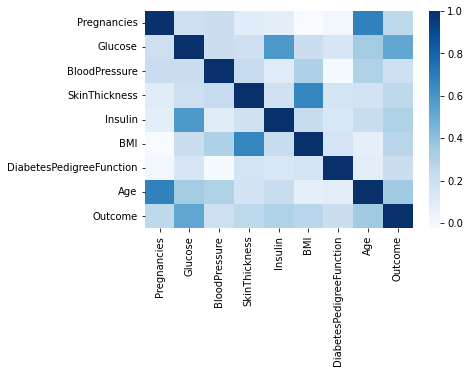

In [6]:
print(diabeties.corr())
sns.heatmap(diabeties.corr(), cmap="Blues")

In [7]:
#Lets prepare the data for training and testing purpose
X_orig = diabeties.drop(columns=['Outcome'], axis=1)
y = diabeties.Outcome

In [8]:
# As the std, mean, min, max are very different, hence its good to scale the data on same scale
print("Shape before standard scaling {}".format(X_orig.shape))
std_scaler = preprocessing.StandardScaler()
X = std_scaler.fit_transform(X_orig)
print("Shape after standard scaling {}".format(X.shape))

# Create dataframe from X so that we can see whether data is called now or not
diabeties_scaled = pd.DataFrame(X, columns=X_orig.columns)

Shape before standard scaling (392, 8)
Shape after standard scaling (392, 8)


In [9]:
diabeties_scaled.describe()
# You can see that std, mean all are very close to zero, and std is close to 1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-4.021726e-17,3.129583e-17,-4.641624e-16,1.042250e-16,6.485742e-17,1.543550e-16,1.897575e-17,1.028089e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.029213e+00,-2.161731e+00,-3.739001e+00,-2.108484e+00,-1.196867e+00,-2.120941e+00,-1.269525e+00,-9.682991e-01
25%,-7.174265e-01,-7.665958e-01,-6.941640e-01,-7.755315e-01,-6.681786e-01,-6.676780e-01,-7.340909e-01,-7.719850e-01
50%,-4.056403e-01,-1.176959e-01,-5.314565e-02,-1.384444e-02,-2.574448e-01,1.621036e-02,-2.131475e-01,-3.793569e-01
75%,5.297185e-01,6.609841e-01,5.878727e-01,7.478426e-01,2.859877e-01,5.718696e-01,4.751644e-01,5.040564e-01
max,4.271153e+00,2.445459e+00,3.151946e+00,3.223325e+00,5.812990e+00,4.846172e+00,5.497667e+00,4.921123e+00


In [22]:
X_train, X_test, y_train, y_test = train_test_split(diabeties_scaled, y, test_size=0.3, random_state=0)

In [24]:
#Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
#Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none']
log_r = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_r.fit(X_train, y_train)
# TODO: Check hyper parameters solver and penalty combination and understand when to use what.

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [25]:
y_pred = log_r.predict(X_test)

In [26]:
# How many of the model's classification are actually correct True Positive + True Negative / Total 
print("Accuracy of model {}".format(accuracy_score(y_test, y_pred)))
# Precision is How many result are correctly identified as diabetic that is TP/TP+FP
print("Precision of model {}".format(precision_score(y_test, y_pred)))
# Recall is how many diabetic predicted out of real diabetic person that is TP/TP+FN
print("Recall of model {}".format(recall_score(y_test, y_pred)))

Accuracy of model 0.7796610169491526
Precision of model 0.7666666666666667
Recall of model 0.5476190476190477


In [14]:
# Now lets see how other algorithm do over Logistric regression
dtc = DecisionTreeClassifier(max_depth=4)
dtc.fit(X_test, y_test)

DecisionTreeClassifier(max_depth=4)

In [15]:
y_pred = dtc.predict(X_test)
# How many of the model's classification are actually correct True Positive + True Negative / Total 
print("Accuracy of model {}".format(accuracy_score(y_test, y_pred)))
# Precision is How many result are correctly identified as diabetic that is TP/TP+FP
print("Precision of model {}".format(precision_score(y_test, y_pred)))
# Recall is how many diabetic predicted out of real diabetic person that is TP/TP+FN
print("Recall of model {}".format(recall_score(y_test, y_pred)))

Accuracy of model 0.9067796610169492
Precision of model 0.7924528301886793
Recall of model 1.0


In [16]:
# Printing confusion metrics to prove above metrics
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
# Here column is predicted while rows are real data, while first one is false, while second one is true be it row or col
# This is how you will read the data
#True Negative (Top-Left Quadrant)
#False Positive (Top-Right Quadrant)
#False Negative (Bottom-Left Quadrant)
#True Positive (Bottom-Right Quadrant)

array([[65, 11],
       [ 0, 42]], dtype=int64)